In [7]:
import pandas as pd
import numpy as np
import copy
import collections
import matplotlib.pyplot  as plt
from IPython.display import display
import math

plt.style.use('dark_background')

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [8]:
raw_data = pd.read_csv('data.csv', sep='\t', index_col=0).reset_index(drop=True)

In [9]:
raw_data.head()

,C1,C2
0,1.388261,2.076096
1,2.177247,3.102304
2,0.378645,5.307610
3,3.681732,1.622681
4,2.462861,2.777897


In [10]:
def get_dist(target, centers):
    dists = []
    for center in centers:
        dists.append(math.sqrt((target.C1 - center[0]) ** 2 + (target.C2 - center[1]) ** 2))
    return [idx for idx, t in enumerate(dists) if t == min(dists)][0]

In [11]:
def squared_error(target, center):
    return (target.C1 - center[0]) ** 2 + (target.C2 - center[1]) ** 2

In [12]:
def kmeans_cluster(raw_data, k = 2):
    target = copy.deepcopy(raw_data)
    center_x = np.random.uniform(target['C1'].min(), target['C1'].max(), [1,k])
    center_y = np.random.uniform(target['C2'].min(), target['C2'].max(), [1,k])
    init_centers = list(zip(center_x.tolist()[0], center_y.tolist()[0]))
    iter_cnt = 0
    centers = copy.deepcopy(init_centers)
    new_centers = copy.deepcopy(init_centers)
    break_flag = False
    while True:
        iter_cnt += 1
        target['cluster'] = target.apply(lambda x: get_dist(x, centers), axis=1)
        target['error'] = target.apply(lambda x: squared_error(x, centers[int(x.cluster)]), axis=1)
        sse = target.error.sum()
        print('loop %s\'s sse: %s' % (iter_cnt, sse))

        for i in range(k):
            new_centers[i] = (target[target.cluster == i].C1.mean(), target[target.cluster == i].C2.mean())
            if round(new_centers[i][0], 2) == round(centers[i][0], 2) and round(new_centers[i][1], 2) == round(centers[i][1], 2):
                break_flag = True
            else:
                break_flag = False

        if break_flag:
            break
        else:
            centers = copy.deepcopy(new_centers)

    result = copy.deepcopy(target)        
    print('Final sse(%s iterations) is %s' % (iter_cnt, sse))
    return sse

In [13]:
elbow_values = []
ks = range(2, 6)

for k in ks:
    print('Run k-mean(k = %s)' % k)
    elbow_values.append(kmeans_cluster(raw_data, k))

Run k-mean(k = 2)
loop 1's sse: 19537.920000830643
loop 2's sse: 17241.661253421316
loop 3's sse: 15117.673008168837
loop 4's sse: 13603.030695938553
loop 5's sse: 12831.011623907369
loop 6's sse: 12497.862929939385
loop 7's sse: 12305.409363265582
loop 8's sse: 12192.596747618129
loop 9's sse: 12094.165997808215
loop 10's sse: 11997.954394718858
loop 11's sse: 11928.486928774757
loop 12's sse: 11875.550052654904
loop 13's sse: 11828.848085919915
loop 14's sse: 11799.56286720069
loop 15's sse: 11783.683014713704
loop 16's sse: 11779.794378099086
loop 17's sse: 11777.504722698555
loop 18's sse: 11775.60980363058
loop 19's sse: 11775.083639074051
Final sse(19 iterations) is 11775.083639074051
Run k-mean(k = 3)
loop 1's sse: 34673.183517120175
loop 2's sse: 12686.199739416234
loop 3's sse: 9509.508784806256
loop 4's sse: 7609.570597028192
loop 5's sse: 7195.636476391681
loop 6's sse: 7144.484715344903
loop 7's sse: 7127.218646397587
loop 8's sse: 7120.189571747745
loop 9's sse: 7117.30982

In [14]:
elbow_values

[11775.083639074051, 7117.309823242896, 5637.139982107263, 5171.752870945675]

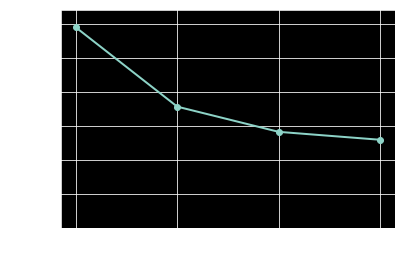

In [15]:
plt.ylim(0, max(elbow_values)+1000) 
plt.xlabel('number of clusters, k')
plt.ylabel('elbow_value')
plt.xticks(ks)
plt.plot(ks, elbow_values, '-o')